In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from IPython.display import clear_output

In [4]:
import aics_da

## modifiy pdf

In [36]:
nG = []
L = 1000
N = 2
as_ = np.arange(0, 5, 0.5)
ks = [100, 300, 1000, 3000, 10000]
for K in ks:
    xs = np.random.normal(size=(N, K))
    for a in as_:
        print("K={}, a={}".format(K, a))
        ys = np.array([xs[0] + a*xs[1]**2, xs[1]])
        ngs = [aics_da.non_gaussianity(ys, L) for _ in range(10)]
        nG.append((np.average(ngs), np.std(ngs)))
        clear_output(True)

K=10000, a=4.5


In [37]:
nGm = np.array(nG)[:, 0].reshape((len(ks), len(as_))).T
nGvar = np.array(nG)[:, 1].reshape((len(ks), len(as_))).T

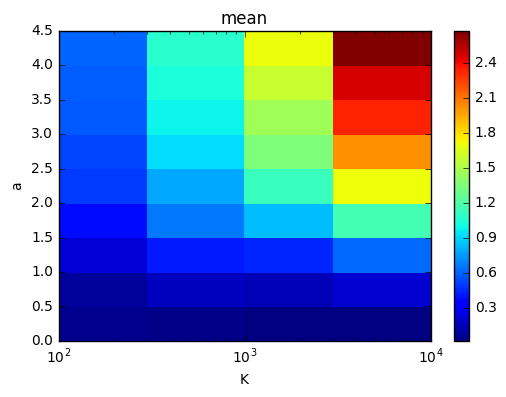

In [38]:
X, Y = np.meshgrid(ks, as_)
plt.pcolormesh(X, Y, nGm)
plt.title("mean")
plt.xscale("log")
plt.axis("tight")
plt.colorbar()
plt.xlabel("K")
plt.ylabel("a")

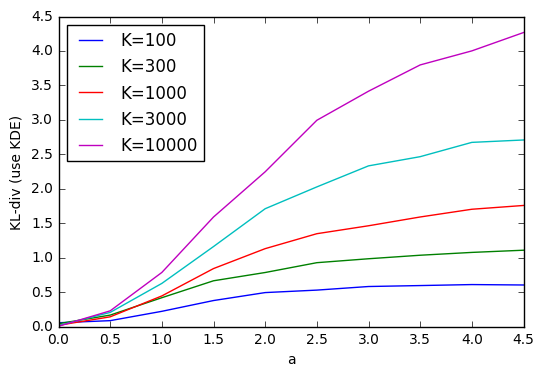

In [39]:
for i in range(len(ks)):
    plt.plot(as_, nGm[:, i], label="K={}".format(ks[i]))
plt.legend(loc=2)
plt.xlabel("a")
plt.ylabel("KL-div (use KDE)")

- Kが小さいとaが大きくなった時の差が見えなくなる(Kが大きいと見える)
- Kの大きさで単純に値が大きくなってる